In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [22]:
df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [23]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [24]:
# Dropping the index column, as it's not necessary 
df.reset_index(drop=True, inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [25]:
# Simplifying some column names
df = df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          35040 non-null  object 
 1   Usage_kWh                     35040 non-null  float64
 2   Lagging_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                           35040 non-null  float64
 5   Lagging_Power_Factor          35040 non-null  float64
 6   Leading_Power_Factor          35040 non-null  float64
 7   NSM                           35040 non-null  int64  
 8   WeekStatus                    35040 non-null  object 
 9   Day_of_week                   35040 non-null  object 
 10  Load_Type                     35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [26]:
# Check if there is missing data
df.isnull().sum().sort_values(ascending=False)

date                            0
Usage_kWh                       0
Lagging_Reactive_Power_kVarh    0
Leading_Reactive_Power_kVarh    0
CO2                             0
Lagging_Power_Factor            0
Leading_Power_Factor            0
NSM                             0
WeekStatus                      0
Day_of_week                     0
Load_Type                       0
dtype: int64

There are no missing values in the dataset.

In [27]:
# Checking the values in the date column
df["date"].value_counts()

date
01/01/2018 00:15    1
01/09/2018 08:45    1
01/09/2018 07:15    1
01/09/2018 07:30    1
01/09/2018 07:45    1
                   ..
02/05/2018 14:45    1
02/05/2018 14:30    1
02/05/2018 14:15    1
02/05/2018 14:00    1
31/12/2018 00:00    1
Name: count, Length: 35040, dtype: int64

In [28]:
# Checking the Load_Type column
df["Load_Type"].value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

Observing that the Light_Load Load_Type occurs most frequently, at first glance it appears to be twice as much as the next Load_Type (Medium_Load). Medium_Load and Maximum_Load occur nearly as frequently as eachother.

**Exploring the Data**

In [29]:
# Summary statistics of the dataset
df.describe()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [30]:
# Checking for correlations in the numerical values
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

                              Usage_kWh  Lagging_Reactive_Power_kVarh  \
Usage_kWh                      1.000000                      0.896150   
Lagging_Reactive_Power_kVarh   0.896150                      1.000000   
Leading_Reactive_Power_kVarh  -0.324922                     -0.405142   
CO2                            0.988180                      0.886948   
Lagging_Power_Factor           0.385960                      0.144534   
Leading_Power_Factor           0.353566                      0.407716   
NSM                            0.234610                      0.082662   

                              Leading_Reactive_Power_kVarh       CO2  \
Usage_kWh                                        -0.324922  0.988180   
Lagging_Reactive_Power_kVarh                     -0.405142  0.886948   
Leading_Reactive_Power_kVarh                      1.000000 -0.332777   
CO2                                              -0.332777  1.000000   
Lagging_Power_Factor                              0.526

In [49]:
# Visualizing the correlation matrix
fig = px.imshow(correlation_matrix, text_auto='.2f')

fig.update_layout(
    # I'm hiding the title because I have failed to center it, will return and re-try if there's time - Jonathan
    # title="Correlation Matrix of Numerical Data",
    width=1500,
    height=600,
    coloraxis=dict(colorscale='RdBu')
)

fig.show()

We can see the correlation of the numeric values features. For example: 
* Usage has high correlation with Lagging Reactive Power and CO2. When power use is high, Lagging Reactive Power and C02 are also high.
* Leading Power Factor and Leading Reactive Power share a strong negative correlation, implying that an increase in one will decrease the other.

In [60]:
load_type_distribution = df.groupby(["Load_Type"]).count().reset_index()
load_type_dist_fig = px.bar(load_type_distribution, x="Load_Type", y="date", title="Distribution of Load Type")
load_type_dist_fig.show()

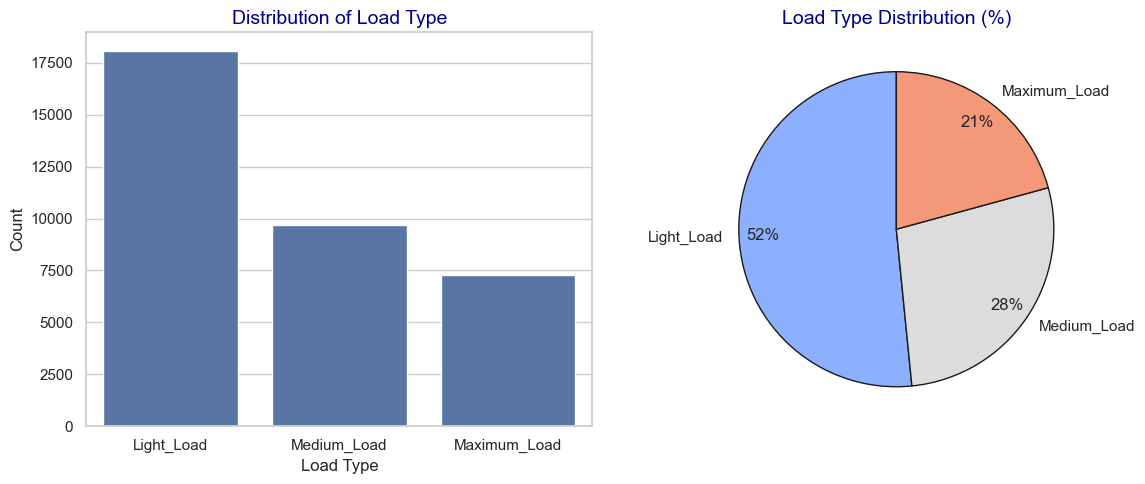

In [65]:
# Setting a style
sns.set(style="whitegrid")

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot of "Load_Type" distribution
sns.countplot(data=df, x="Load_Type", ax=ax[0])
ax[0].set_title('Distribution of Load Type', fontsize=14, color='darkblue')
ax[0].set_xlabel('Load Type', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# Pie chart of "Load_Type" percentage distribution
loadtype_count = df.Load_Type.value_counts()
colors = sns.color_palette('coolwarm', len(loadtype_count))

# Plotting a pie chart of load type distribution
ax[1].pie(loadtype_count, labels=loadtype_count.index, autopct='%1.0f%%', 
          startangle=90, colors=colors, pctdistance=0.85, wedgeprops=dict(edgecolor='k'))

ax[1].set_title('Load Type Distribution (%)', fontsize=14, color='darkblue')

# Show the plot
plt.tight_layout()
plt.show()

The 'Light load type' has the highest contribution which contributed more than half (52%) of the total.

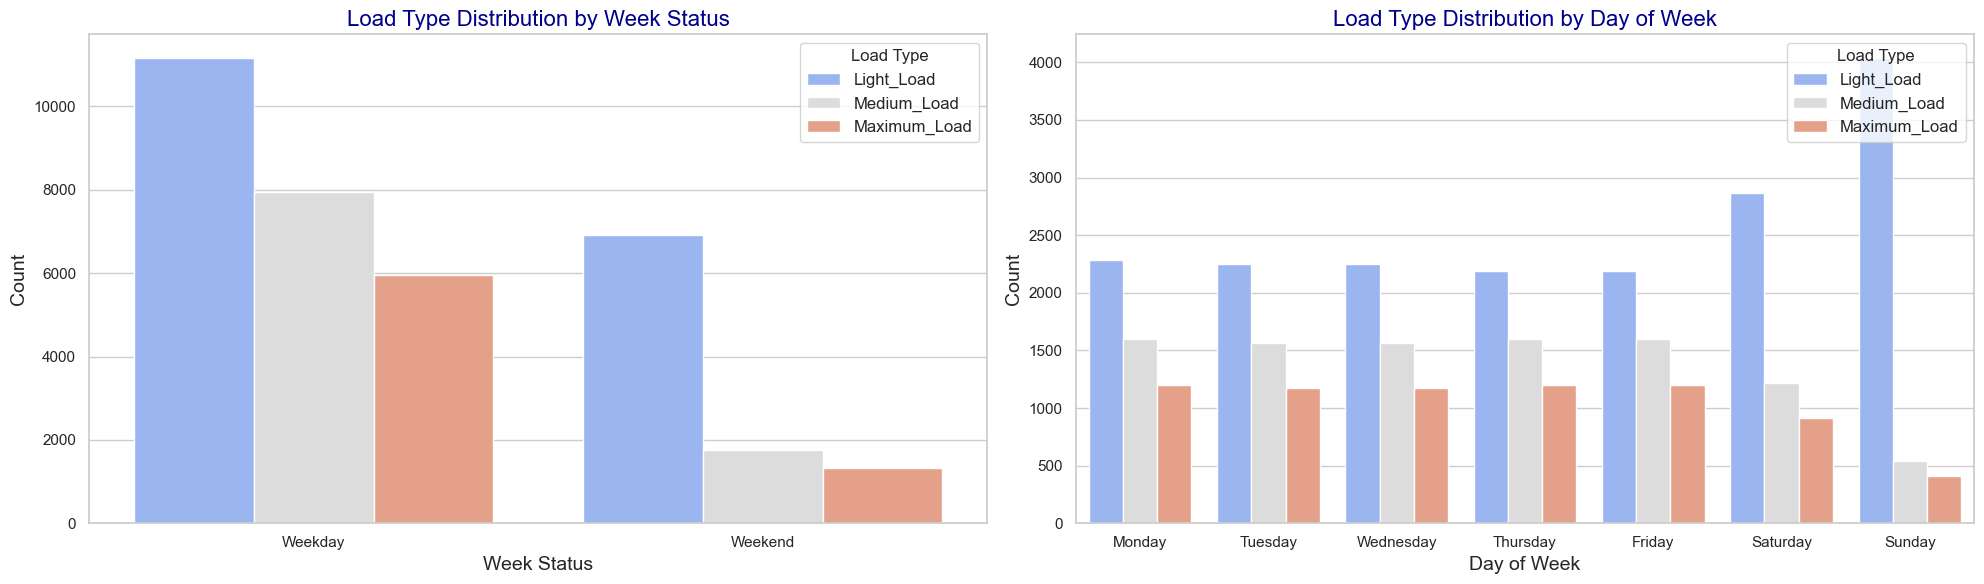

In [66]:
# Setting a style
sns.set(style="whitegrid")

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting 'WeekStatus' divided by 'Load_Type'
sns.countplot(data=df, x="WeekStatus", hue="Load_Type", palette='coolwarm', ax=ax[0])
ax[0].set_title('Load Type Distribution by Week Status', fontsize=16, color='darkblue')
ax[0].set_xlabel('Week Status', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

# Plotting 'Day_of_week' divided by 'Load_Type'
sns.countplot(data=df, x="Day_of_week", hue="Load_Type", palette='coolwarm', ax=ax[1])
ax[1].set_title('Load Type Distribution by Day of Week', fontsize=16, color='darkblue')
ax[1].set_xlabel('Day of Week', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)

# Adjusting the legend position
for axis in ax:
    axis.legend(title='Load Type', loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

As before, the 'Light load type' has higher proportion on Weekends, increasing on weekends and peaking on Sunday.

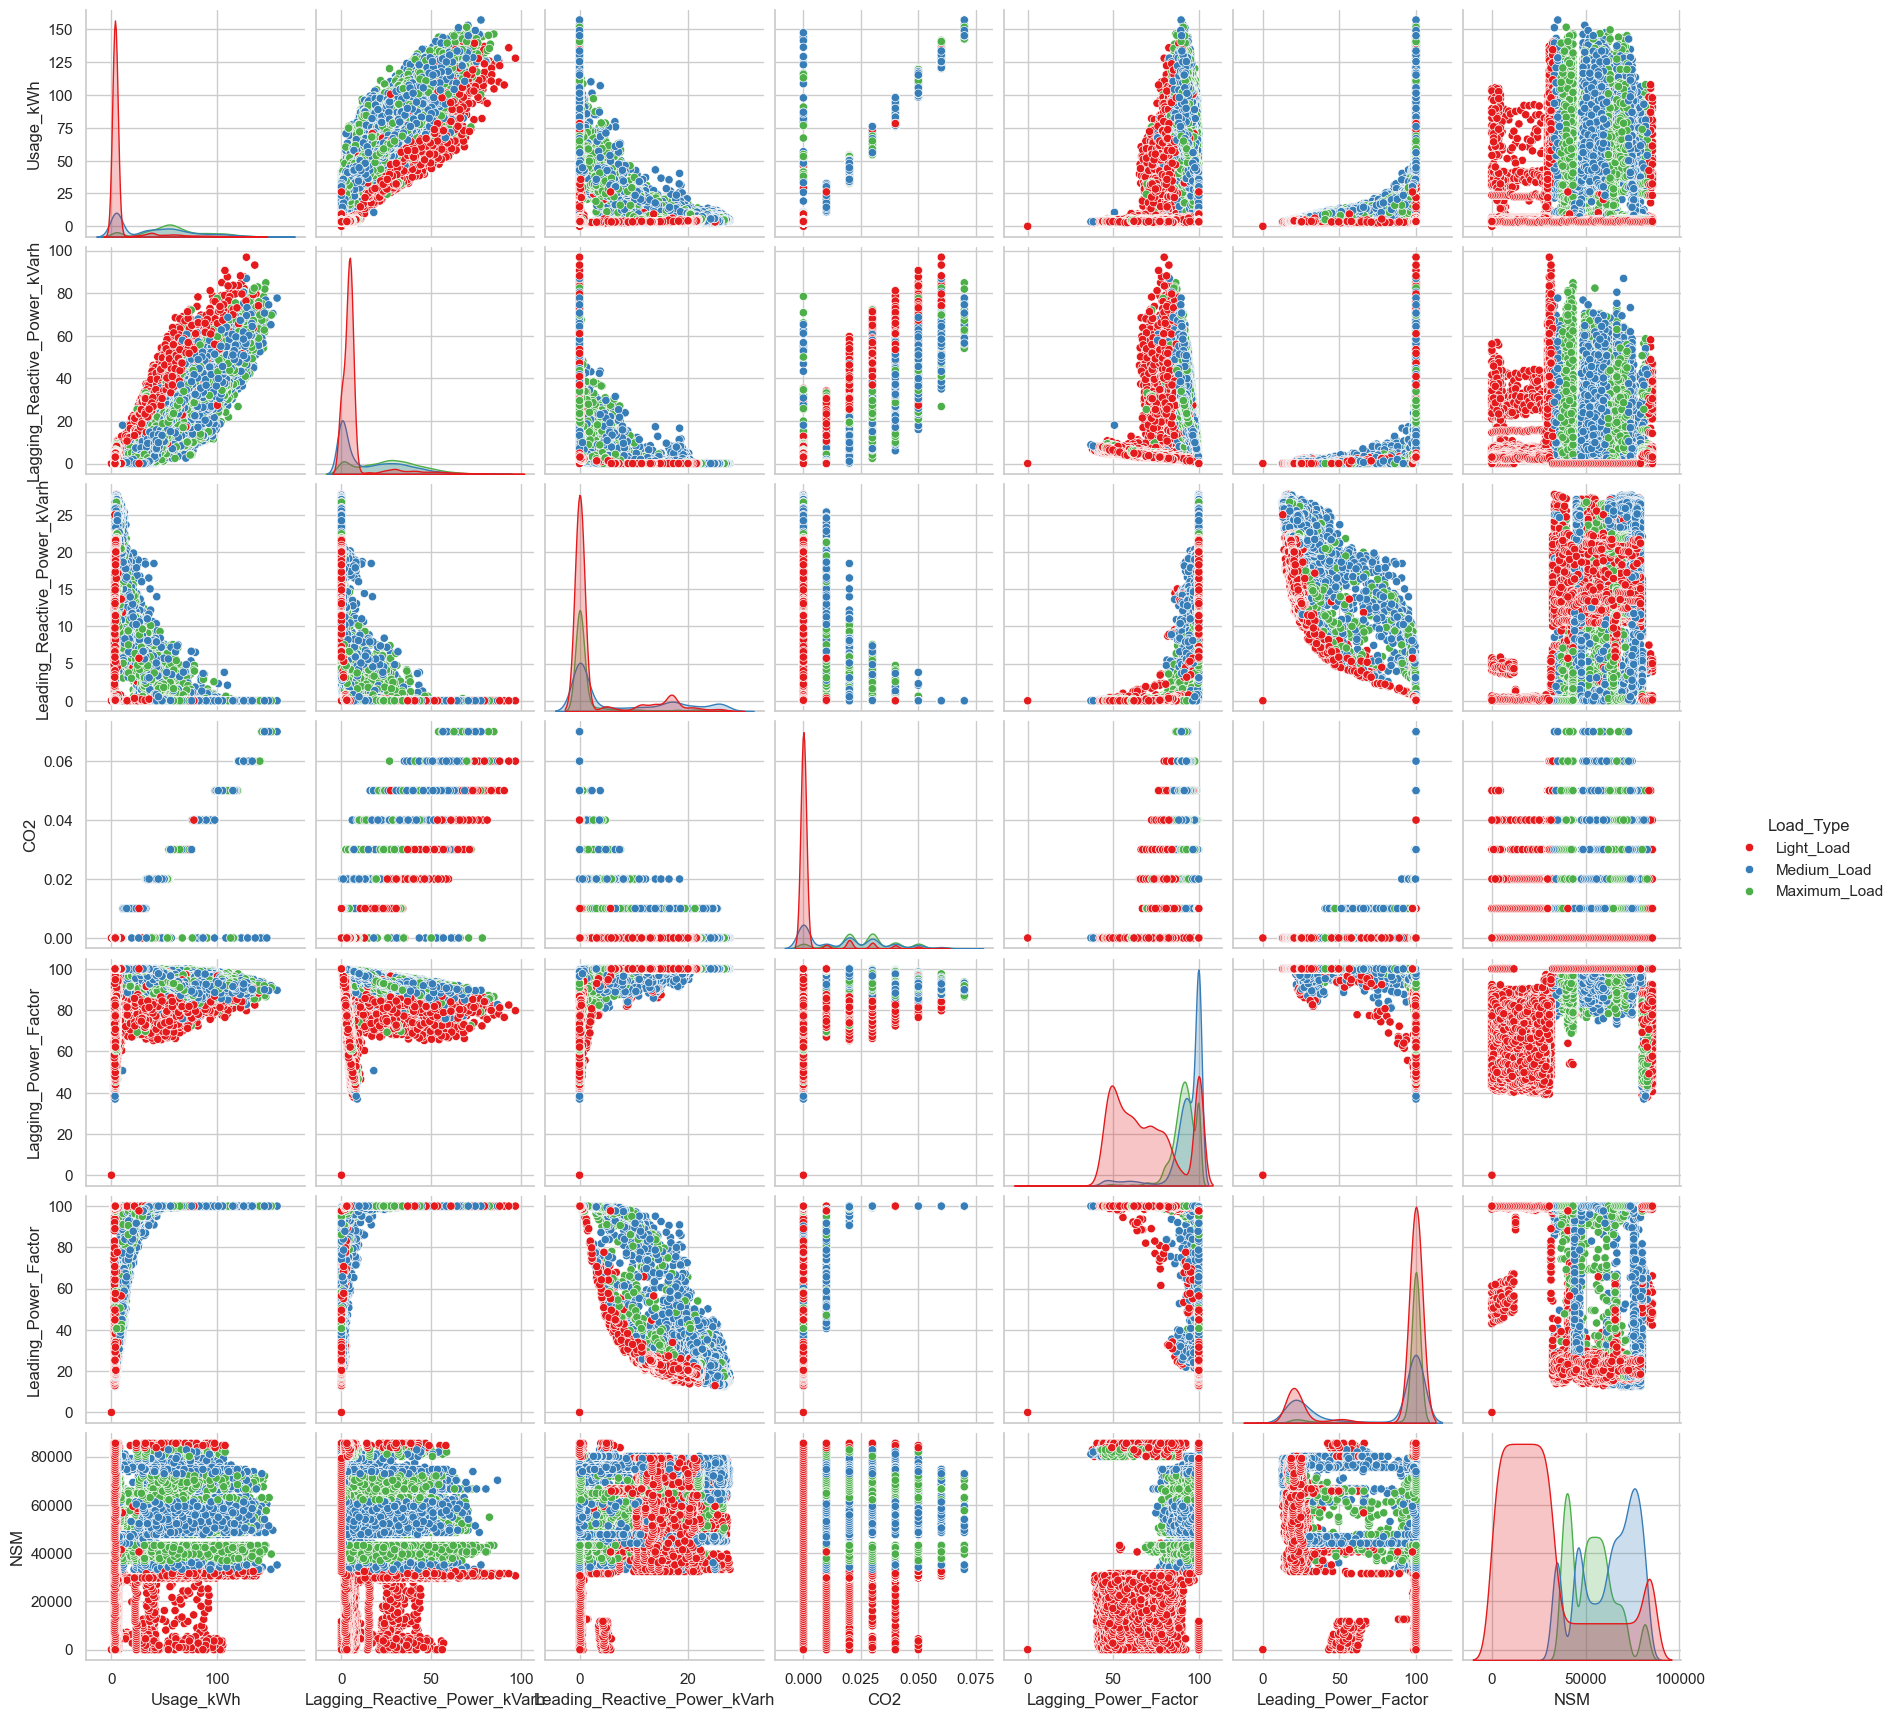

In [20]:
sns.pairplot(df, hue = 'Load_Type', vars = ['Usage_kWh', 'Lagging_Reactive_Power_kVarh', 'Leading_Reactive_Power_kVarh', 'CO2', 'Lagging_Power_Factor', 'Leading_Power_Factor', 'NSM'], palette = 'Set1' );

There is a moderate, positive relationship between lagging reactive power and usage, and a negative association between leading reactive power and usage. The relationship of usage vs lagging power factor and usage vs leading power factor both do not show a very strong positive relation. However, when lagging or leading power are high, the usage is also high.